In [1]:
# Step 1: Exploring and pre-processing of the dataset for classification

In [2]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as ask
import seaborn as sns

In [3]:
# Load dataset
sales_data = pd.read_csv("sales_data.csv")

In [4]:
# Check the first 5 rows of the dataset
sales_data.head()

,Order_No,Qty_Ordered,Price,Sales,Status,Product_Line,Product_Code,Deal_Size
0,10107,30,95.70,2871.00,Shipped,Eye Shadow,CST-1001,Small
1,10121,34,81.35,2765.90,Shipped,Eye Shadow,CST-1001,Small
2,10134,41,94.74,3884.34,Shipped,Eye Shadow,CST-1001,Medium
3,10145,45,83.26,3746.70,Shipped,Eye Shadow,CST-1001,Medium
4,10159,49,100.00,5205.27,Shipped,Eye Shadow,CST-1001,Medium


In [5]:
# Check the last 5 rows of the dataset
sales_data.tail()

,Order_No,Qty_Ordered,Price,Sales,Status,Product_Line,Product_Code,Deal_Size
2818,10350,20,100.00,2244.40,Shipped,Blushes,CST-1006,Small
2819,10373,29,100.00,3978.51,Shipped,Blushes,CST-1006,Medium
2820,10386,43,100.00,5417.57,Resolved,Blushes,CST-1006,Medium
2821,10397,34,62.24,2116.16,Shipped,Blushes,CST-1006,Small
2822,10414,47,65.52,3079.44,On Hold,Blushes,CST-1006,Medium


In [6]:
# Check the number of rows and columns of the dataset
sales_data.shape

(2823, 8)

In [7]:
# Check the summary of the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_No      2823 non-null   int64  
 1   Qty_Ordered   2823 non-null   int64  
 2   Price         2823 non-null   float64
 3   Sales         2814 non-null   float64
 4   Status        2823 non-null   object 
 5   Product_Line  2823 non-null   object 
 6   Product_Code  2823 non-null   object 
 7   Deal_Size     2823 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 176.6+ KB


In [8]:
# This info shows that 'Sales' coulmn have null values, which means data cleaning is required.
# we will do data cleaning in next steps. 

In [9]:
# Check the description of the dataset
sales_data.describe()

,Order_No,Qty_Ordered,Price,Sales
count,2823.000000,2823.000000,2823.000000,2814.000000
mean,10258.725115,35.092809,83.658544,3553.802530
std,92.085478,9.741443,20.174277,1841.522315
min,10100.000000,6.000000,26.880000,482.130000
25%,10180.000000,27.000000,68.860000,2203.837500
50%,10262.000000,35.000000,95.700000,3184.410000
75%,10333.500000,43.000000,100.000000,4508.000000
max,10425.000000,97.000000,100.000000,14082.800000


In [10]:
# Data Cleaning
# we will fill NaN Values in 'Sales' columns with 'mean'.

sales_data = sales_data.fillna(sales_data.Sales.mean())
sales_data.head()

,Order_No,Qty_Ordered,Price,Sales,Status,Product_Line,Product_Code,Deal_Size
0,10107,30,95.70,2871.00,Shipped,Eye Shadow,CST-1001,Small
1,10121,34,81.35,2765.90,Shipped,Eye Shadow,CST-1001,Small
2,10134,41,94.74,3884.34,Shipped,Eye Shadow,CST-1001,Medium
3,10145,45,83.26,3746.70,Shipped,Eye Shadow,CST-1001,Medium
4,10159,49,100.00,5205.27,Shipped,Eye Shadow,CST-1001,Medium


In [11]:
# Check again if there is any NaN value
sales_data.isnull().sum()

Order_No        0
Qty_Ordered     0
Price           0
Sales           0
Status          0
Product_Line    0
Product_Code    0
Deal_Size       0
dtype: int64

In [12]:
# Convert 'Price' and 'Sales' coulmn into integer

sales_data.Price = sales_data.Price.astype(int)
sales_data.Sales = sales_data.Sales.astype(int)
sales_data.head()

,Order_No,Qty_Ordered,Price,Sales,Status,Product_Line,Product_Code,Deal_Size
0,10107,30,95,2871,Shipped,Eye Shadow,CST-1001,Small
1,10121,34,81,2765,Shipped,Eye Shadow,CST-1001,Small
2,10134,41,94,3884,Shipped,Eye Shadow,CST-1001,Medium
3,10145,45,83,3746,Shipped,Eye Shadow,CST-1001,Medium
4,10159,49,100,5205,Shipped,Eye Shadow,CST-1001,Medium


In [13]:
# Explore unique values in 'Deal_Size' column

sales_data.Deal_Size.value_counts()

Medium    1384
Small     1282
Large      157
Name: Deal_Size, dtype: int64

<Axes: xlabel='Deal_Size', ylabel='count'>

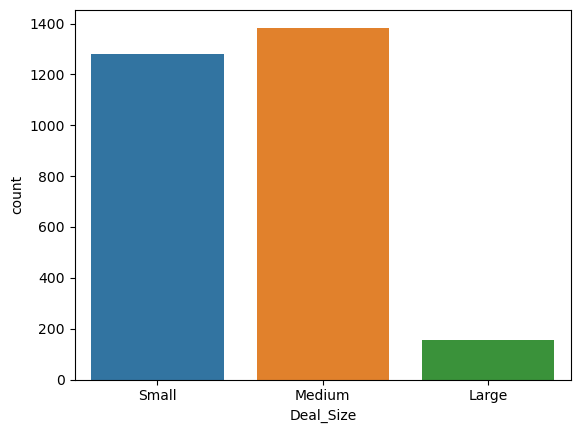

In [14]:
# Visualise imbalance classes

sns.countplot(sales_data, x='Deal_Size')

In [15]:
# As 'Deal_Size' column has categorical values, we will replace them with numerical values

sales_data = sales_data.replace({
    'Deal_Size' : {'Small':0, 'Medium':1, 'Large':2}
})
sales_data.head()

,Order_No,Qty_Ordered,Price,Sales,Status,Product_Line,Product_Code,Deal_Size
0,10107,30,95,2871,Shipped,Eye Shadow,CST-1001,0
1,10121,34,81,2765,Shipped,Eye Shadow,CST-1001,0
2,10134,41,94,3884,Shipped,Eye Shadow,CST-1001,1
3,10145,45,83,3746,Shipped,Eye Shadow,CST-1001,1
4,10159,49,100,5205,Shipped,Eye Shadow,CST-1001,1


In [16]:
# First we will describe Input and Output variables

# Input Varibales

X = sales_data.iloc[:, [1,2,3]].values
X[0:3]

array([[  30,   95, 2871],
       [  34,   81, 2765],
       [  41,   94, 3884]], dtype=int64)

In [17]:
# Output Variable

y = sales_data.iloc[:,7].values            
y[0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [18]:
# Data Splitting into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.30, random_state = 0, stratify = y )

# Print Train and Test dataset number of rows and cloumns

print('Input Train Set:', X_train.shape, 'Output Train Set:', y_train.shape)
print('Input Test Set:', X_test.shape, 'Output Test Set:', y_test.shape)

Input Train Set: (1976, 3) Output Train Set: (1976,)
Input Test Set: (847, 3) Output Test Set: (847,)


In [19]:
# Use oversampling to balance the imbalance classes

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state = 0)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)


<Axes: ylabel='count'>

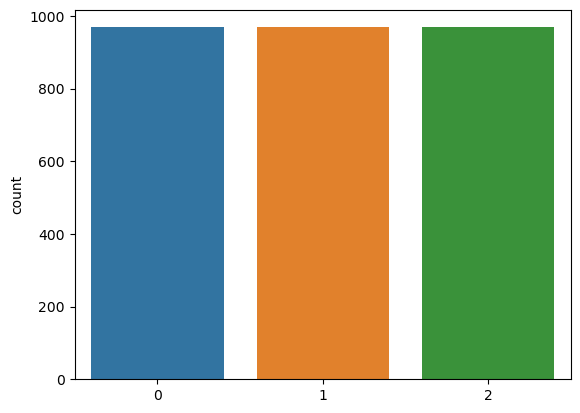

In [20]:
# Visualise balanced classes

sns.countplot(x=y_train_oversampled)

In [21]:
# Data Normalization

from sklearn.preprocessing import StandardScaler

# Normalize Training Data

sc =StandardScaler()
X_train_SS = sc.fit_transform(X_train_oversampled)
X_train_SS[0:3]

array([[-0.31734108, -1.39493616, -0.99042431],
       [-1.64456706, -1.86636567, -1.38519663],
       [ 0.56747623, -2.12827094, -0.99440095]])

In [22]:
# Normalize Test Data

X_test_SS = sc.transform(X_test)
X_test_SS[0:3]

array([[ 0.30203104, -1.49969828, -0.86570228],
       [-0.49430455,  0.64792501,  0.13930417],
       [ 0.4789945 ,  0.64792501,  0.05940977]])

In [23]:
# Step 2: Calssification by using Decision Tree Model

In [24]:
# Instantiating the Model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Training the Model

model.fit(X_train_SS, y_train_oversampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
# Model Evaluation

# Predict the Test set results of Output variable and print

y_predict = model.predict(X_test_SS)
print(y_predict)

[0 1 1 1 0 0 0 0 1 1 0 2 1 1 0 0 0 1 1 1 1 0 0 0 1 1 2 1 1 0 0 0 0 1 0 0 0
 1 0 1 2 1 1 0 1 0 0 1 2 2 1 0 1 0 0 1 1 1 0 1 1 1 0 2 1 0 1 1 1 2 0 0 1 0
 0 1 0 1 0 2 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 2 1 1 2 2 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 0 0 0 0 1
 0 1 0 1 0 0 0 2 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 2 0 1 1 0 1 1 0 1
 0 0 0 1 0 1 1 0 1 1 0 1 2 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 2 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 2 0 0 1 0 1 0 1 1 0 2 2 0 0 0 1 1 1 0 1 2 1
 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 2 1 1 0 1 1 0 1 0 0 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 2 1 0 0 1 1 0 2 1 0 0 1 2 1 1 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 2 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 2 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 2 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 2 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 1 

In [26]:
# Print the actual values of Output variable in Test dataset

print(y_test)

[0 1 1 1 0 0 0 0 1 1 0 2 1 1 0 0 0 1 1 1 1 0 0 0 1 1 2 1 1 0 0 0 0 1 0 0 0
 1 0 1 2 1 1 0 1 0 0 1 2 2 1 0 1 0 0 1 1 1 0 1 1 1 0 2 1 0 1 1 1 2 0 0 1 0
 0 1 0 1 0 2 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 2 1 1 2 2 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 0 0 0 0 1
 0 1 0 1 0 0 0 2 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 2 0 1 1 0 1 1 0 1
 0 0 0 1 0 1 1 0 1 1 0 1 2 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 2 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 2 0 0 1 0 1 0 1 1 0 2 2 0 0 0 1 1 1 0 1 2 1
 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 2 1 1 0 1 1 0 1 0 0 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 2 1 0 0 1 1 0 2 1 0 0 1 2 1 1 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 2 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 2 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 2 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 2 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 1 

In [27]:
# Check accuracy score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , y_predict)
print("Accuracy : {}".format(round(accuracy*100,4))) 
print(classification_report(y_test , y_predict))

Accuracy : 99.8819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       415
           2       0.98      1.00      0.99        47

    accuracy                           1.00       847
   macro avg       0.99      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847



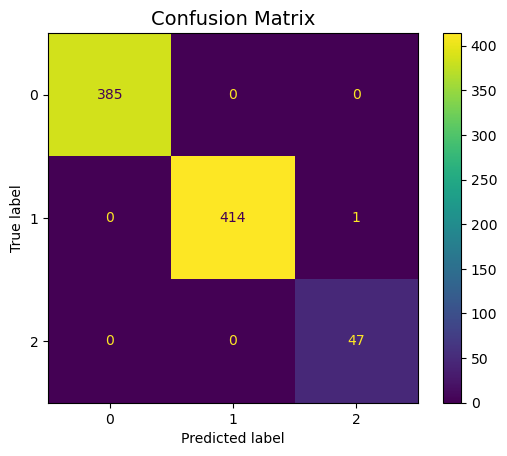

In [28]:
# Check confusion matrics

from sklearn.metrics import classification_report
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Confusion Matrix", fontsize=14)
plt.show()